In [1]:
import dynamo as dyn
import anndata
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
zebrafish_adata = dyn.sample_data.zebrafish()

adata = dyn.sample_data.zebrafish()


|-----> setting visualization default mode in dynamo. Your customized matplotlib settings might be overritten.
|-----> Downloading data to ./data/zebrafish.h5ad
|-----> Downloading data to ./data/zebrafish.h5ad


In [2]:
path = "./data/zebrafish_3d_umap.h5ad"
# dyn.pp.recipe_monocle(adata)
# dyn.tl.reduceDimension(adata, n_components=3)

# dyn.tl.dynamics(adata)
# dyn.data_io.cleanup(adata)
# adata.write_h5ad(path)
adata = anndata.read_h5ad(path)
# adata = dyn.sample_data.pancreatic_endocrinogenesis()


In [3]:
adata


AnnData object with n_obs × n_vars = 4181 × 16940
    obs: 'split_id', 'sample', 'Size_Factor', 'condition', 'Cluster', 'Cell_type', 'umap_1', 'umap_2', 'batch', 'nGenes', 'nCounts', 'pMito', 'pass_basic_filter', 'spliced_Size_Factor', 'initial_spliced_cell_size', 'initial_cell_size', 'unspliced_Size_Factor', 'initial_unspliced_cell_size', 'ntr', 'cell_cycle_phase'
    var: 'nCells', 'nCounts', 'pass_basic_filter', 'log_cv', 'score', 'log_m', 'use_for_pca', 'frac', 'ntr', 'beta', 'gamma', 'half_life', 'alpha_b', 'alpha_r2', 'gamma_b', 'gamma_r2', 'gamma_logLL', 'delta_b', 'delta_r2', 'bs', 'bf', 'uu0', 'ul0', 'su0', 'sl0', 'U0', 'S0', 'total0', 'use_for_dynamics'
    uns: 'PCs', 'cell_phase_genes', 'dynamics', 'explained_variance_ratio_', 'feature_selection', 'neighbors', 'pca_mean', 'pp', 'umap_fit'
    obsm: 'X', 'X_pca', 'X_umap'
    layers: 'M_s', 'M_ss', 'M_u', 'M_us', 'M_uu', 'X_spliced', 'X_unspliced', 'spliced', 'unspliced', 'velocity_S'
    obsp: 'moments_con'

In [4]:
# for pancreas data... highly variable genes are categorical data, convert to boolean

# adata.var["highly_variable_genes"] = adata.var["highly_variable_genes"] == 'True'

In [5]:
adata.layers["velocity_S"]

<4181x16940 sparse matrix of type '<class 'numpy.float64'>'
	with 7741690 stored elements in Compressed Sparse Row format>

In [6]:
print(np.sum(np.isnan(adata.layers["velocity_S"].data)))
np.isnan(adata.layers["velocity_S"].toarray())

0


array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

genes: Index(['tmsb4x', 'rplp2l', 'rpl7a'], dtype='object')
|-----> X shape: (4181, 3) V shape: (4181, 3)
|----->>> color vec len: 12543
|----->>> color vec len: 12543
|----->>> color vec len: 12543


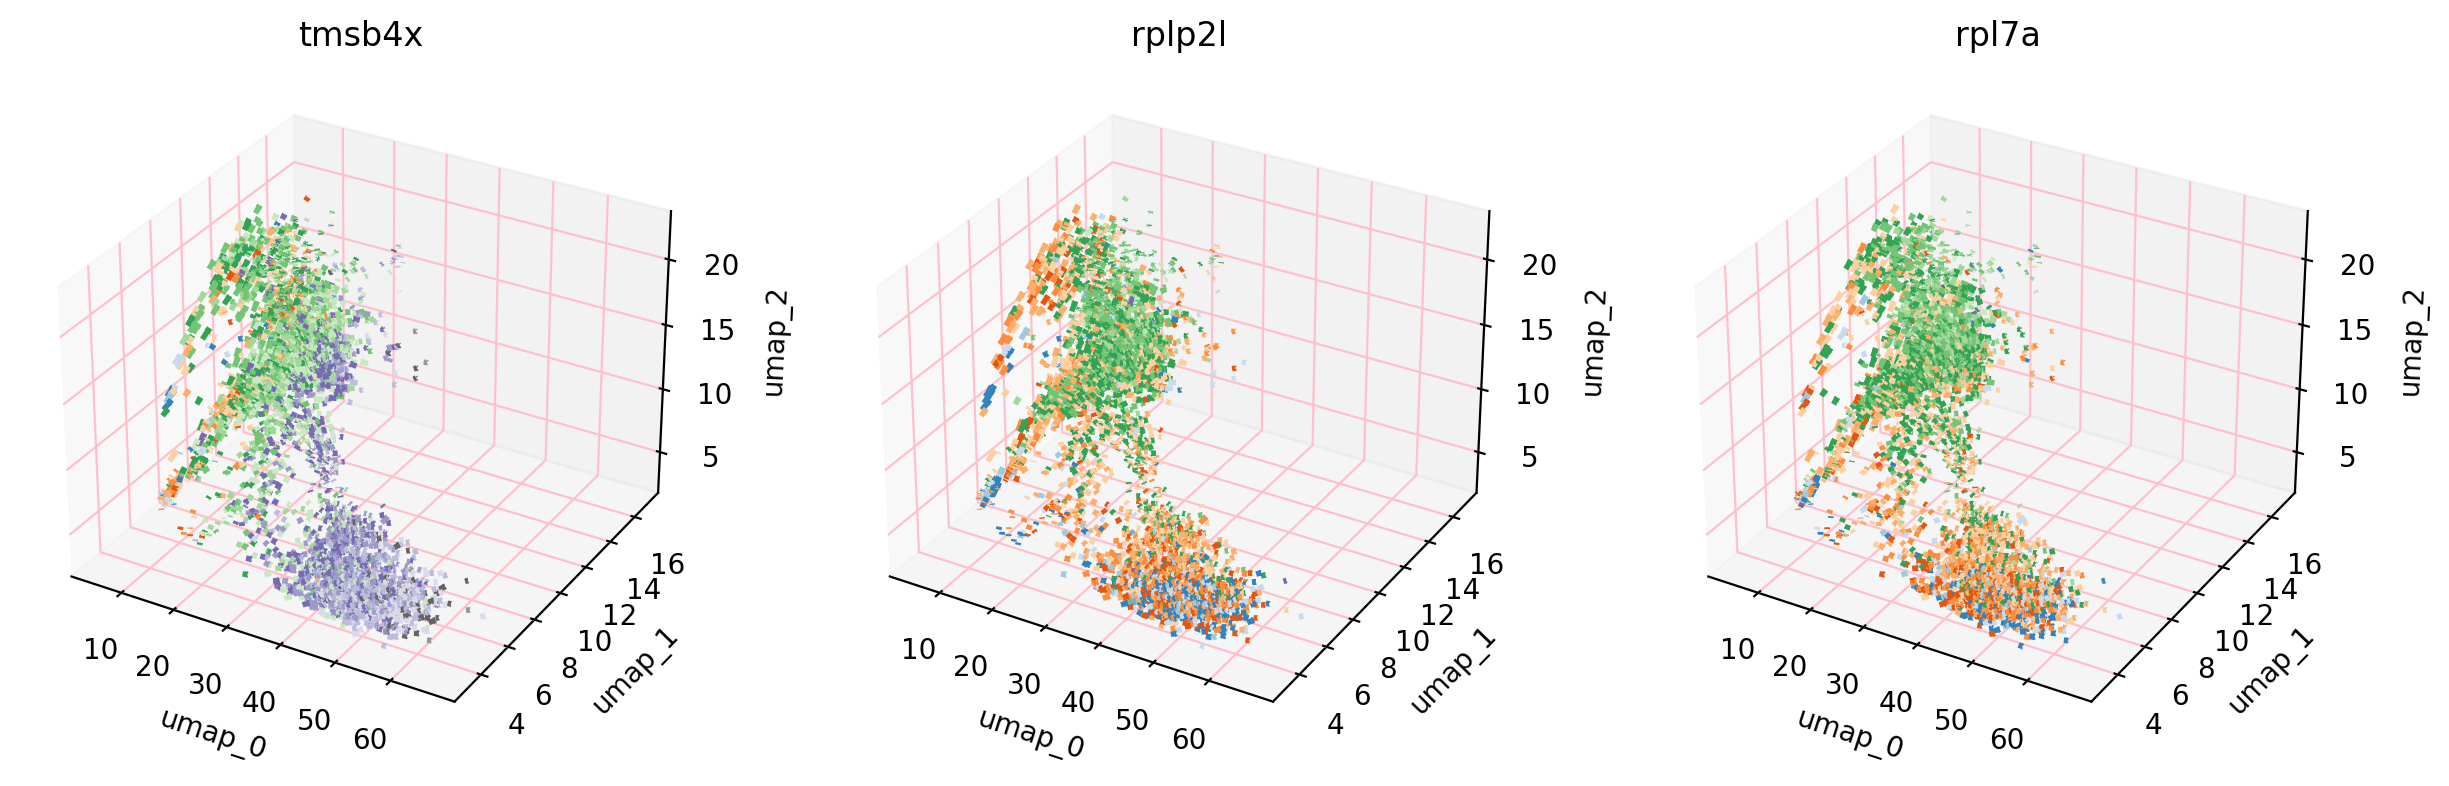

In [15]:
dyn.dynamo_logger.main_set_level(dyn.dynamo_logger.LoggerManager.DEBUG)
from matplotlib import cm

quiver_3d_kwargs = {
    "zorder": 3,
    "length": 10,
    "linewidth": 2,
    "arrow_length_ratio": 0.4,
    "norm": cm.colors.Normalize(),  # for color
    # "cmap": cm.copper,
    # "cmap": cm.Spectral,
    # "cmap": cm.Reds,
    "cmap": cm.Pastel1,
    "cmap": cm.tab20c,
}
# genes = adata[:, adata.var["highly_variable_genes"]].var_names[20:23]
genes = adata[:, adata.var["use_for_pca"]].var_names[:3]
print("genes:", genes)
dyn.pl.cell_wise_vectors_3d(
    adata,
    # X=adata.obsm["X_umap"],
    # X=adata.obsm["X_pca"],
    X=adata.layers["M_s"].toarray(),
    # V=adata[:, genes].layers["velocity_S"].toarray(),
    V=adata[:, genes].obsm["X_pca"].toarray(),
    color=genes,
    save_show_or_return="show",
    figsize=(20, 30),
    quiver_3d_kwargs=quiver_3d_kwargs,
    grid_color="pink",
    axis_label_prefix="umap"
)


In [8]:
adata

AnnData object with n_obs × n_vars = 4181 × 16940
    obs: 'split_id', 'sample', 'Size_Factor', 'condition', 'Cluster', 'Cell_type', 'umap_1', 'umap_2', 'batch', 'nGenes', 'nCounts', 'pMito', 'pass_basic_filter', 'spliced_Size_Factor', 'initial_spliced_cell_size', 'initial_cell_size', 'unspliced_Size_Factor', 'initial_unspliced_cell_size', 'ntr', 'cell_cycle_phase'
    var: 'nCells', 'nCounts', 'pass_basic_filter', 'log_cv', 'score', 'log_m', 'use_for_pca', 'frac', 'ntr', 'beta', 'gamma', 'half_life', 'alpha_b', 'alpha_r2', 'gamma_b', 'gamma_r2', 'gamma_logLL', 'delta_b', 'delta_r2', 'bs', 'bf', 'uu0', 'ul0', 'su0', 'sl0', 'U0', 'S0', 'total0', 'use_for_dynamics'
    uns: 'PCs', 'cell_phase_genes', 'dynamics', 'explained_variance_ratio_', 'feature_selection', 'neighbors', 'pca_mean', 'pp', 'umap_fit'
    obsm: 'X', 'X_pca', 'X_umap'
    layers: 'M_s', 'M_ss', 'M_u', 'M_us', 'M_uu', 'X_spliced', 'X_unspliced', 'spliced', 'unspliced', 'velocity_S'
    obsp: 'moments_con'

Xshape: (4181, 3)
Vshape: (4181, 3)
|-----> X shape: (4181, 3) V shape: (4181, 3)
|----->>> color vec len: 12543
|----->>> color vec len: 12543
|----->>> color vec len: 12543


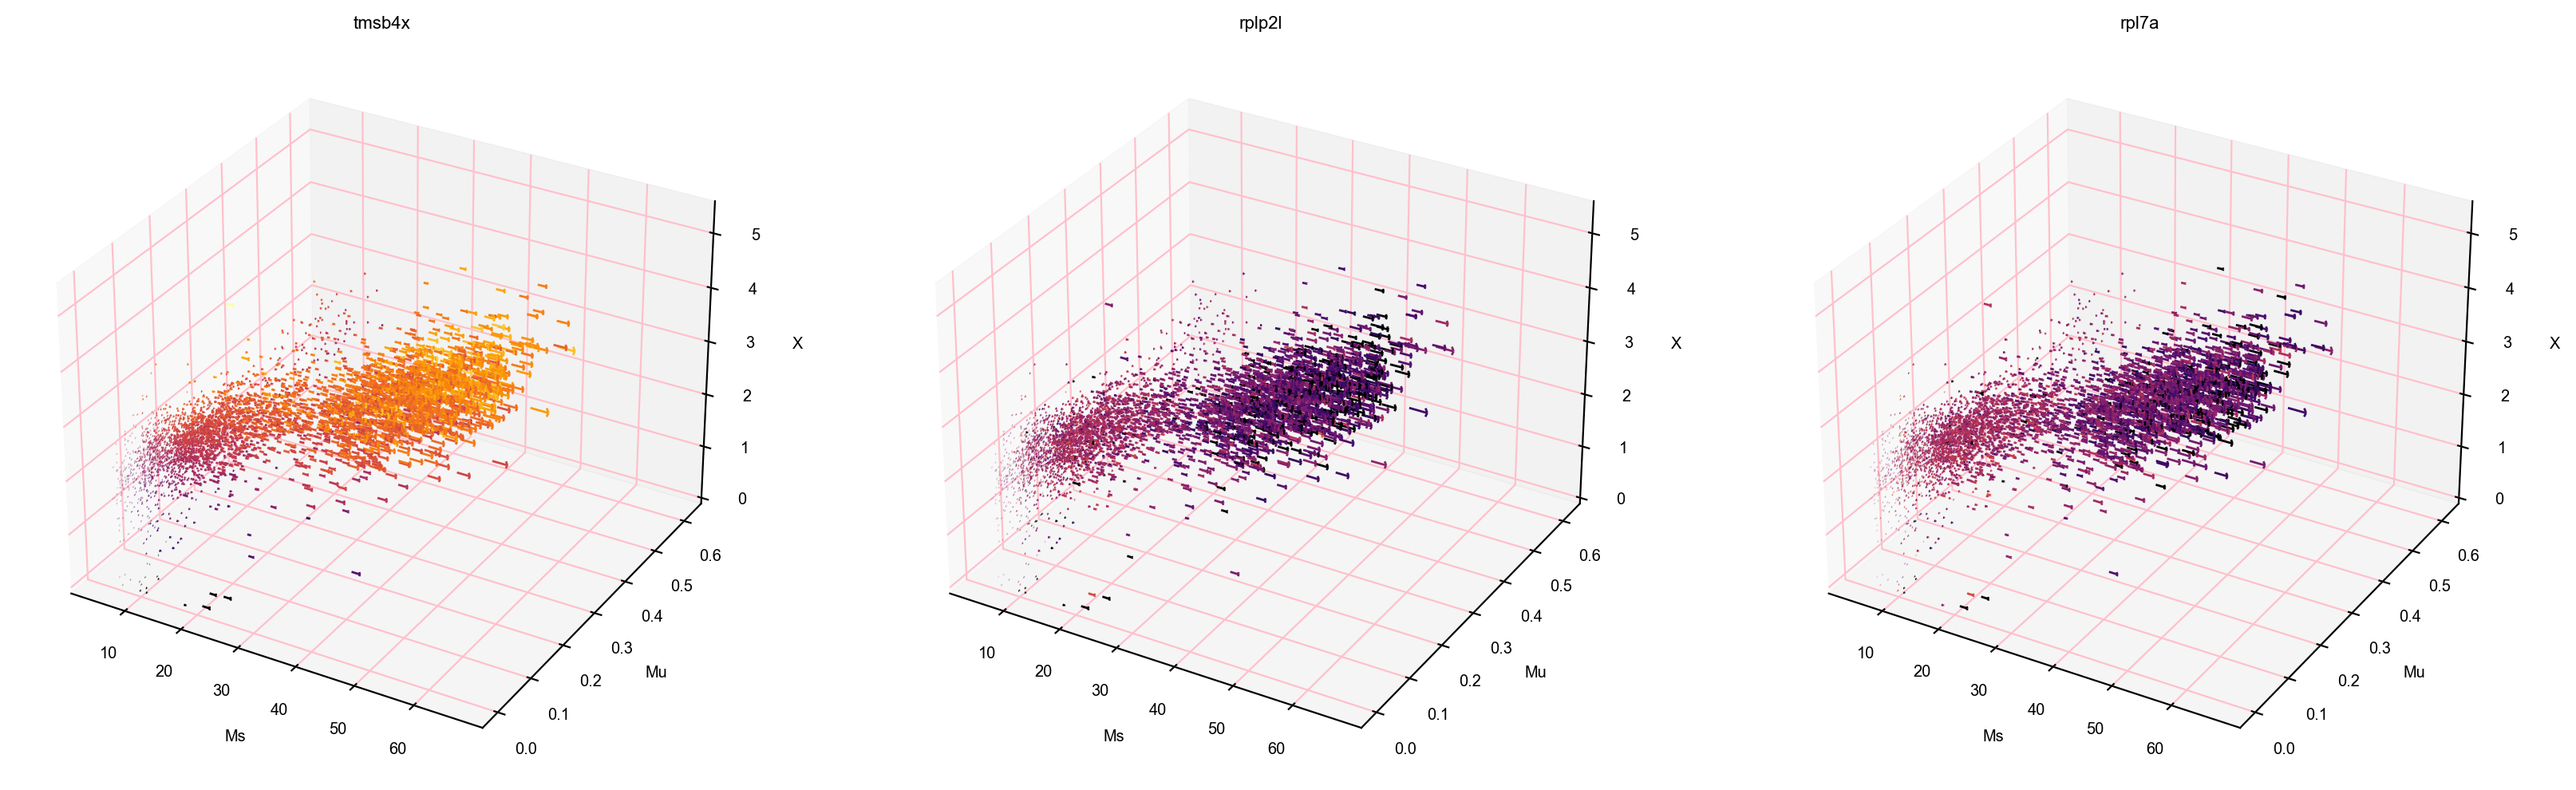

In [9]:
dyn.dynamo_logger.main_set_level(dyn.dynamo_logger.LoggerManager.DEBUG)
from matplotlib import cm

quiver_3d_kwargs = {
    "zorder": 3,
    "length": 20,
    "linewidth": 1,
    "arrow_length_ratio": 0.1,
    "norm": cm.colors.Normalize(),  # for color
    # "cmap": cm.copper,
    # "cmap": cm.Spectral,
    # "cmap": cm.Reds,
    # "cmap": cm.Pastel1,
    # "cmap": cm.tab20c,
    # "cmap": cm.terrain,
    "cmap": cm.inferno,
}
# genes = adata[:, adata.var["highly_variable_genes"]].var_names[20:23]
genes = adata[:, adata.var["use_for_pca"]].var_names[:3]
gene = genes[0]
subset_adata = adata[:, gene]
X = np.array([subset_adata.layers["M_s"].toarray().flatten(), subset_adata.layers["M_u"].toarray().flatten(), subset_adata.X.toarray().flatten()]).T
V = np.array([subset_adata.layers["M_ss"].toarray().flatten(), subset_adata.layers["M_uu"].toarray().flatten(), subset_adata.layers["velocity_S"].toarray().flatten()]).T
print("Xshape:", X.shape)
print("Vshape:", V.shape)
dyn.pl.cell_wise_vectors_3d(
    adata,
    # X=adata.obsm["X_umap"],
    # X=adata.obsm["X_pca"],
    X=X,
    V=V,
    color=genes,
    save_show_or_return="show",
    figsize=(20, 10),
    quiver_3d_kwargs=quiver_3d_kwargs,
    grid_color="pink",
    # axis_label_prefix="umap"
    axis_labels=["Ms", "Mu", "X"],
)


In [10]:
import matplotlib

# matplotlib.pyplot.switch_backend("WXAgg")
matplotlib.pyplot.switch_backend("macosx")
print(matplotlib.get_backend())


MacOSX


In [12]:
# dyn.pl.cell_wise_vectors(adata, basis="umap", projection="3d", vector="X", save_show_or_return="show")
# %matplotlib inline
# plt.ion()
plt.clf()
dyn.pl.cell_wise_vectors(
    adata,
    basis="umap",
    projection="3d",
    vector="X",
    save_show_or_return="show",
    show_colorbar=False,
    despline=False,
    show_legend=False,
    use_smoothed=False,
)


|-----> X shape: (4181, 3) V shape: (4181, 3)
|----->>> Plotting basis:['umap'], layer: ['X']
|----->>> colors: ['ntr']
|----->>> coloring scatter of cur_c: ntr
|----->>> handling coordinates, cur_x: 0, cur_y: 1
|----->>> drawing with _matplotlib_points function
|----->>> drawing points by values
|----->>> drawing without frontiers and contour
|----->>> using cmap: viridis
|----->>> hiding legend
|----->>> show, return or save...


<Figure size 640x480 with 0 Axes>

UnboundLocalError: local variable 'axis_bb' referenced before assignment

<Figure size 600x400 with 2 Axes>